# Assignment 5

1. In a study, the researchers wish to see the percentage of registered voters in a  population who were in favor of candidate A in an election was more than 40%. A  random sample of registered voters in this population was taken. Among 800  people participated in the survey, 380 of them voted for candidate A. 
a) Report the 95% confidence interval for estimating the percentage of people in the  population who would vote for candidate A. Please use point estimate ± margin of  error format to report the confidence interval.  
b) If the researchers would like to estimate a sample size for the study, and there is  no prior knowledge of the proportion, how large a sample would be needed for  constructing a confidence interval for estimating the percentage of people will be  in favor of candidate A with a 95 confidence level and a 2% margin of error? 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
sample_size=800
for_A=380
not_for_A=sample_size-for_A
not_for_A

420

In [3]:
votes=[]
for i in range(380):
    votes.append(1)
for i in range(420):
    votes.append(0)

In [4]:
data=pd.DataFrame(votes)

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    print("Point estimate:",m," ±",h)

In [6]:
mean_confidence_interval(data)

Point estimate: 0.475  ± [0.03467844]


In [7]:
#for 95%, z=1.96
n=((1.96/0.02)**2)*(0.5)*(1-0.5)
print("Sample size n=",n)

Sample size n= 2401.0


2. a) Perform a statistical hypothesis test using 5% as the level of significance to see  if the average arm span for the 11th graders in Ohio is more than 160 cm. You  must state null and alternative hypothesis, check normality assumption, report  test statistic value, report p-value, and draw a proper conclusion. (mean=200)
Null hypothesis: The average arm span for the students is 160cm 
Alternative hypothesis: The average arm span for students is more than 160 cm 
Report p-value from the normality test, make a quantile-comparison plot, and  draw a conclusion.
b) Find the 95% confidence interval for estimating the average arm span for  the sampled population.

Null hypothesis: H0: mu<=160
Alternative hypothesis: H1: mu>160

In [8]:
df=pd.read_csv(r'C:\Users\Meet\Downloads\heightandarmspan.csv')

In [9]:
df.head()

,Height,ArmSpan
0,176,177
1,162,163
2,168,161
3,168,160
4,164,156


In [10]:
armspan=df['ArmSpan']
armspan.head()

0    177
1    163
2    161
3    160
4    156
Name: ArmSpan, dtype: int64

In [11]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [12]:
check_normality(armspan)

p value:0.0309
Reject null hypothesis >> The data is not normally distributed


Normality test result has a p-value of 0.0309 which is less than 0.05. There is sufficient 
evidence to support that the data is not likely from the normality distributed population 
based of the normality test. The quantile-comparison 
plot shows only one data point out of the bands. The deviation from normality is not 
severe. Since t-test is somewhat robust against the normality, one may still use t-test for 
mean.

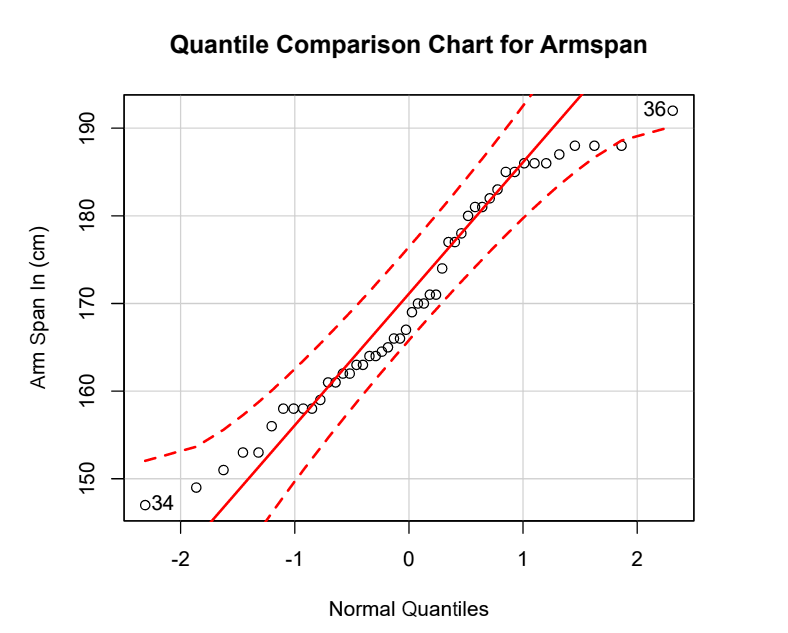

In [13]:
stats.ttest_1samp(a=armspan,popmean=armspan.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

Report p-value from the t-test and use it to draw the conclusion: The p-value calculated is
0.0309, which is less than 0.05 and therefore we reject the null hypothesis. There is
sufficient evidence to support the alternative hypothesis of the average arm span for the 
students in Ohio is greater than 160cm.

In [14]:
mean_confidence_interval(armspan,confidence=0.95)

Point estimate: 168.6  ± 4.026806611287337
